# Oil Price Prediction

In [62]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objs as go
!pip install calplot
import calplot

In [63]:
# Load your dataset (replace with your actual data)
df3 = pd.read_csv(r'C:\Users\Admin\Desktop\Dataset Oil price daily1.csv')
df3

,Date,Price
0,27-12-2016,54.060001
1,28-12-2016,54.060001
2,29-12-2016,53.770000
3,30-12-2016,53.720001
4,01-01-2017,53.025002
...,...,...
1275,17-12-2021,70.860001
1276,20-12-2021,68.230003
1277,21-12-2021,71.120003
1278,22-12-2021,72.760002


In [64]:
df3.shape

(1280, 2)

In [65]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1280 non-null   object 
 1   Price   1280 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.1+ KB


In [66]:
df3.isnull().sum()

Date     0
Price    0
dtype: int64

In [67]:
df3.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1275    False
1276    False
1277    False
1278    False
1279    False
Length: 1280, dtype: bool

In [68]:
df3.describe()

,Price
count,1280.000000
mean,56.773520
std,10.733931
min,31.129999
25%,48.857500
50%,56.459999
75%,65.010002
max,84.650002


# Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data

In [69]:
dt = pd.to_datetime("01/02/1986", format="%m/%d/%Y")
dt1 = pd.to_datetime("10/30/2023", format="%m/%d/%Y")
print((dt1-dt).days)

13815


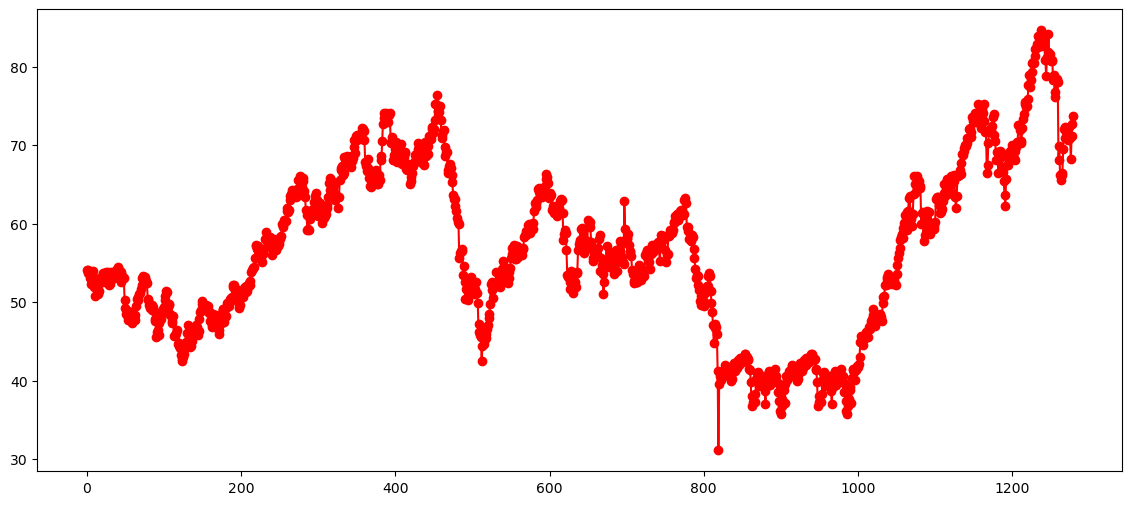

In [70]:
df3['Price'].plot(figsize=(14,6),color='red',marker='o')
plt.show()

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

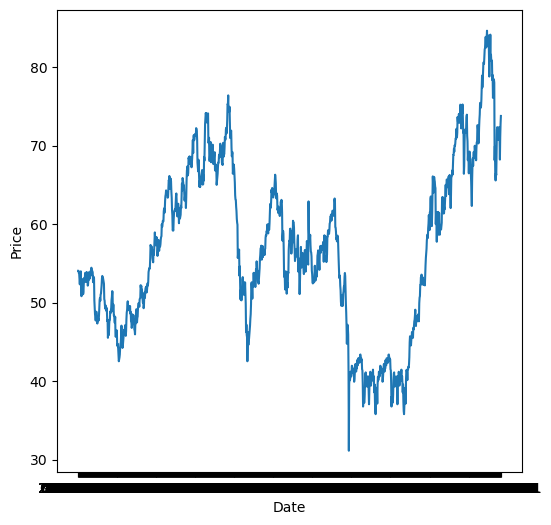

In [72]:
plt.figure(figsize=(6,6))
sns.lineplot(x="Date",y="Price",data=df3)
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)
    
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

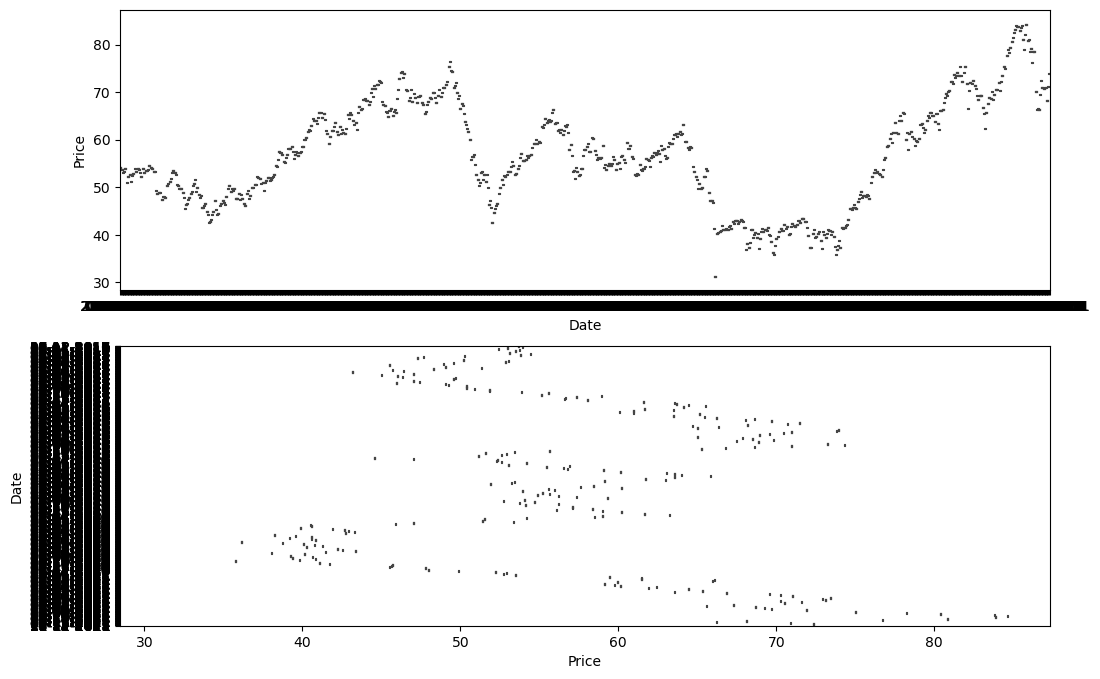

In [73]:
plt.figure(figsize=(12,8))
plt.subplot(211)
sns.boxplot(x="Date",y="Price",data=df3)
plt.subplot(212)
sns.boxplot(x="Price",y="Date",data=df3)
plt.show()

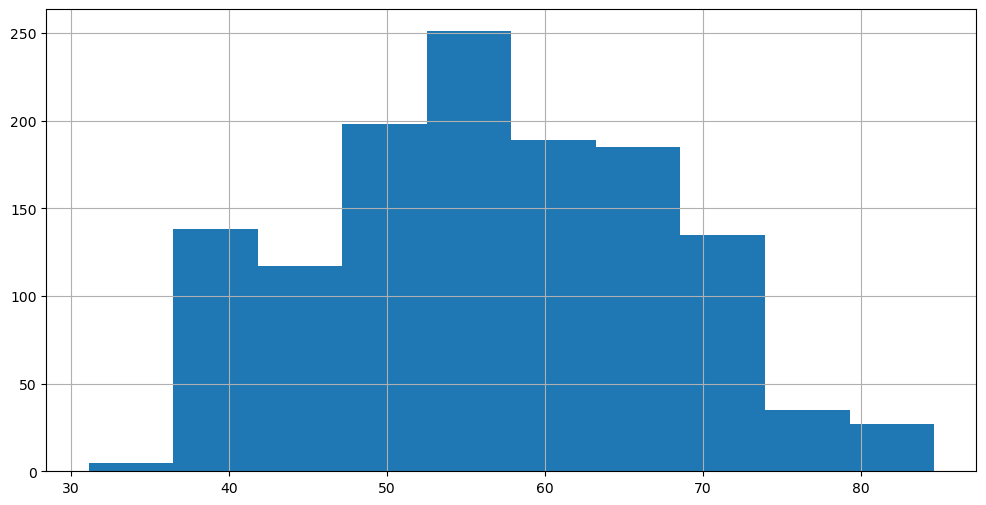

In [74]:
df3.Price.hist(figsize=(12,6))
plt.show()

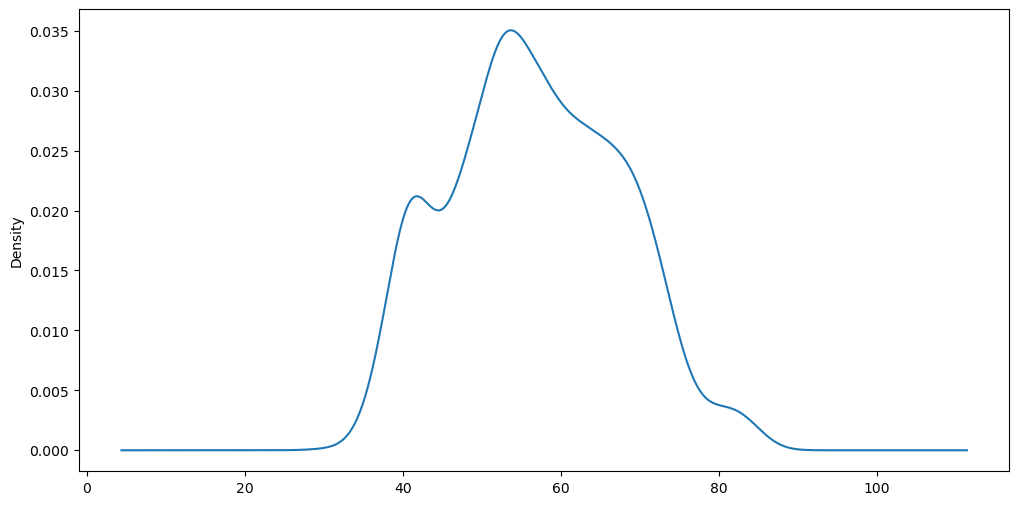

In [75]:
df3.Price.plot(kind='kde',figsize=(12,6))
plt.show()

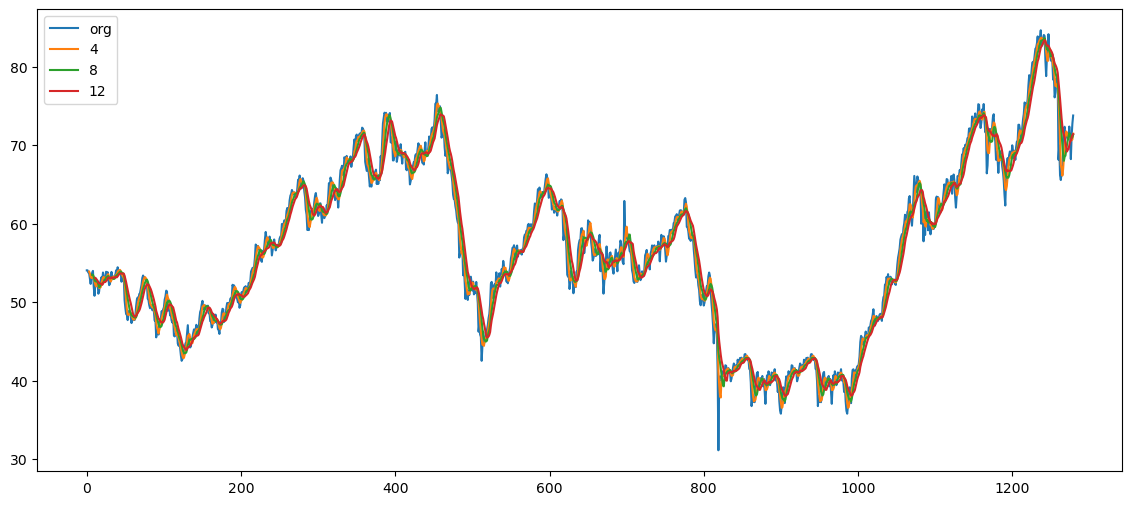

In [76]:
plt.figure(figsize=(14,6))
df3.Price.plot(label="org")
for i in range(4,13,4):
    df3["Price"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

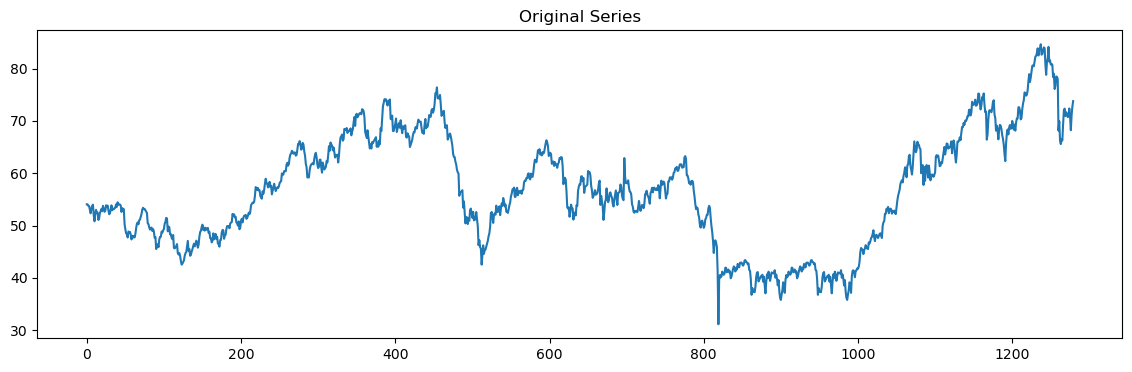

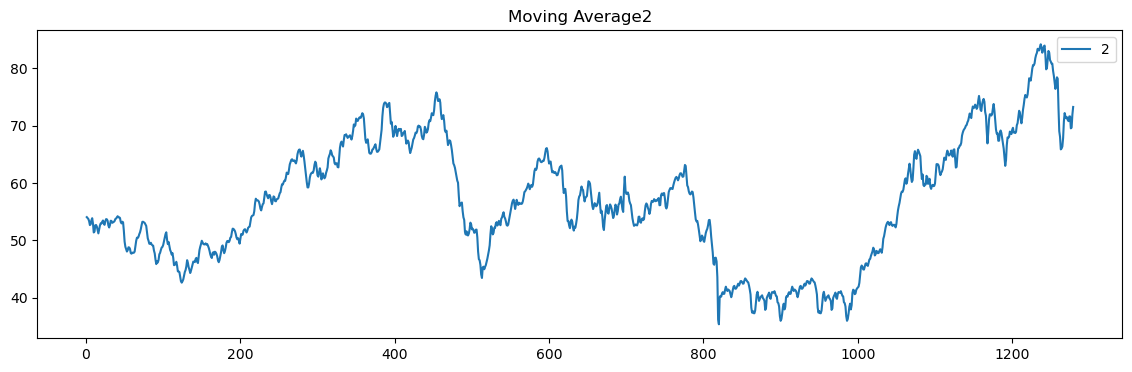

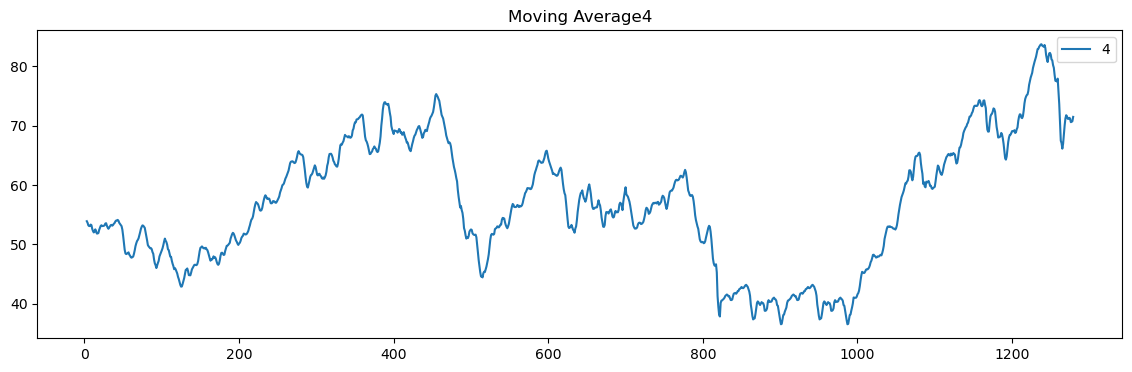

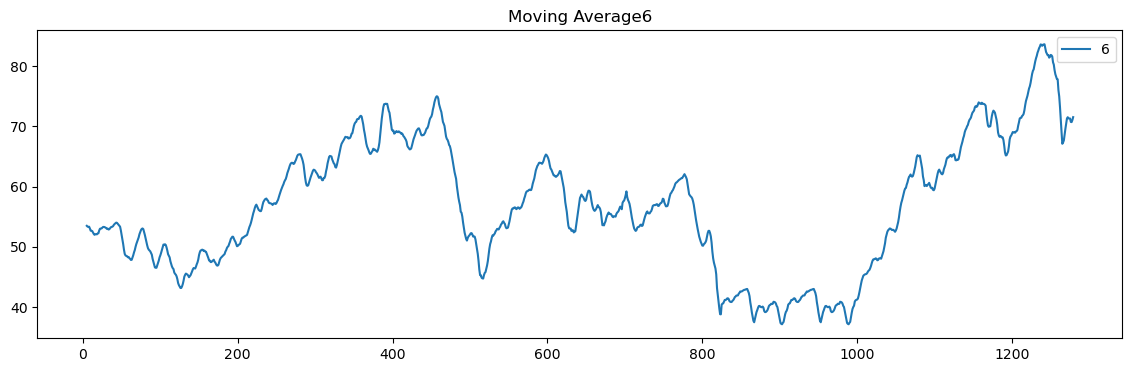

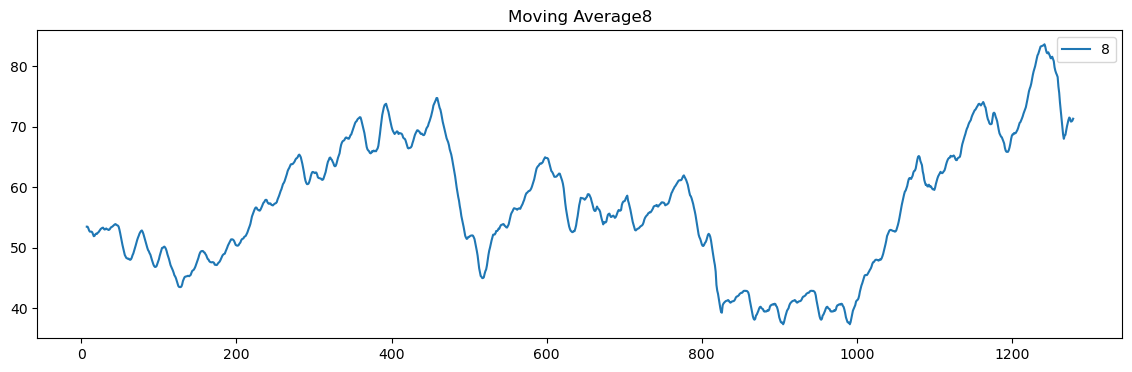

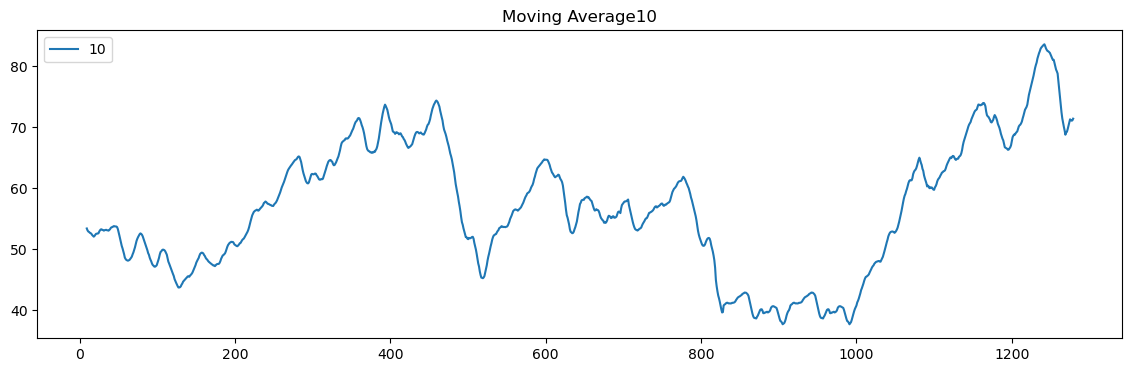

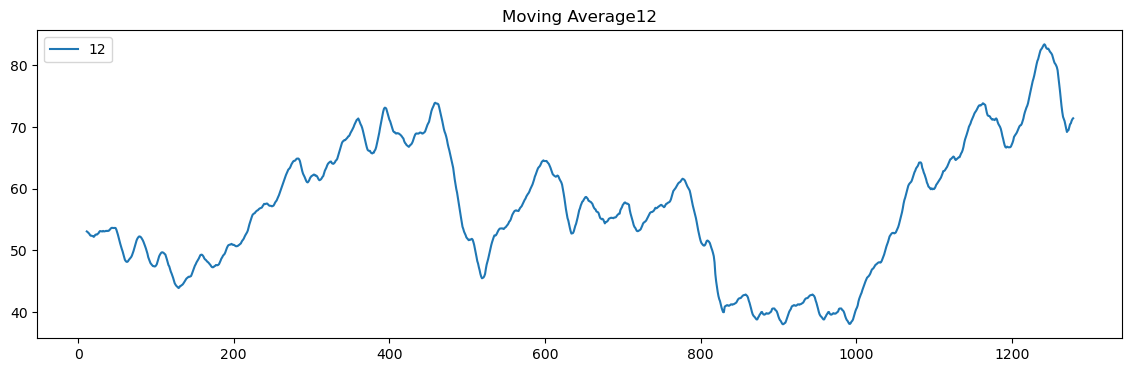

In [77]:
plt.figure(figsize=(14,4))
df3.Price.plot(label="org")
plt.title("Original Series")
for i in range(2,13,2):
    plt.figure(figsize=(14,4))
    df3["Price"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average"+str(i))
    plt.legend(loc='best')
    plt.show()

# Time Series Decomposition plot

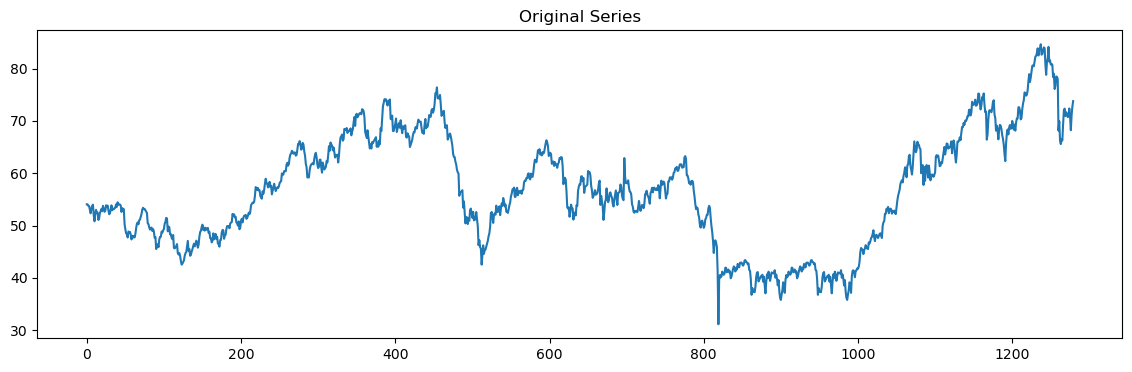

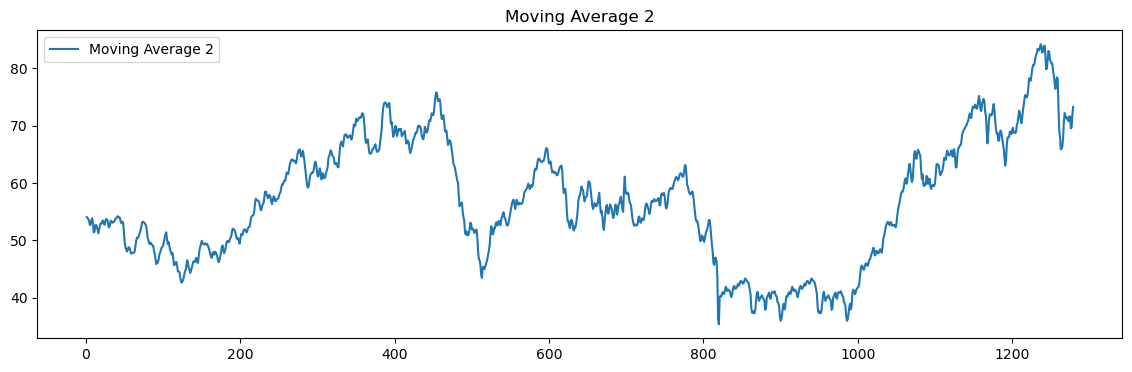

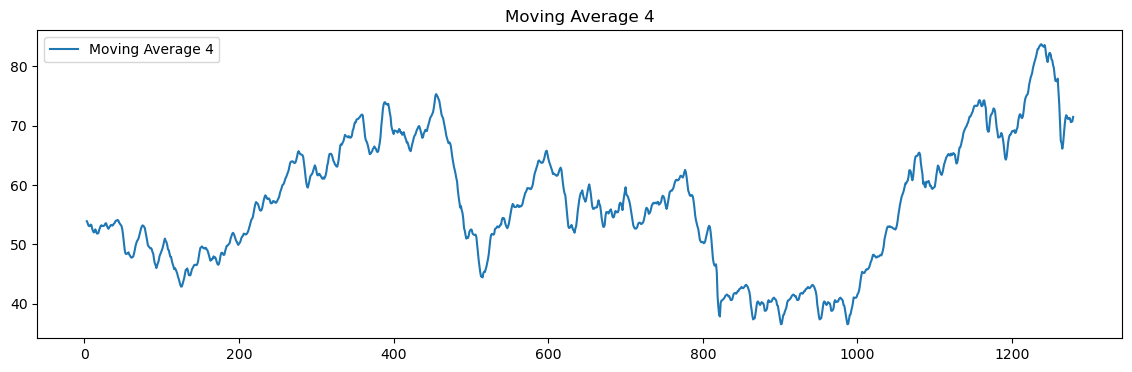

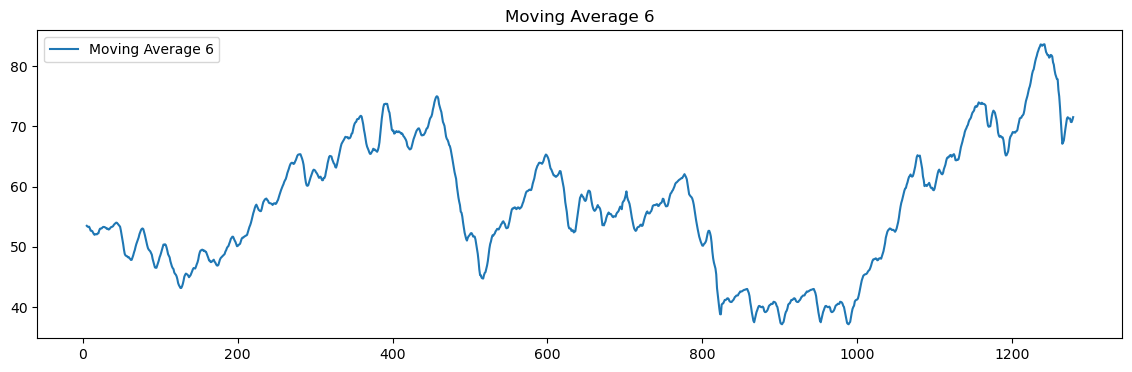

In [78]:
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named "oil_pp" with a column "Price"
# containing your time series data

plt.figure(figsize=(14, 4))
df3.Price.plot(label="Original")
plt.title("Original Series")

for i in range(2, 8, 2):
    plt.figure(figsize=(14, 4))
    df3["Price"].rolling(i).mean().plot(label=f"Moving Average {i}")
    plt.title(f"Moving Average {i}")
    plt.legend(loc='best')
    plt.show()

# ACF Plots and PACF Plots

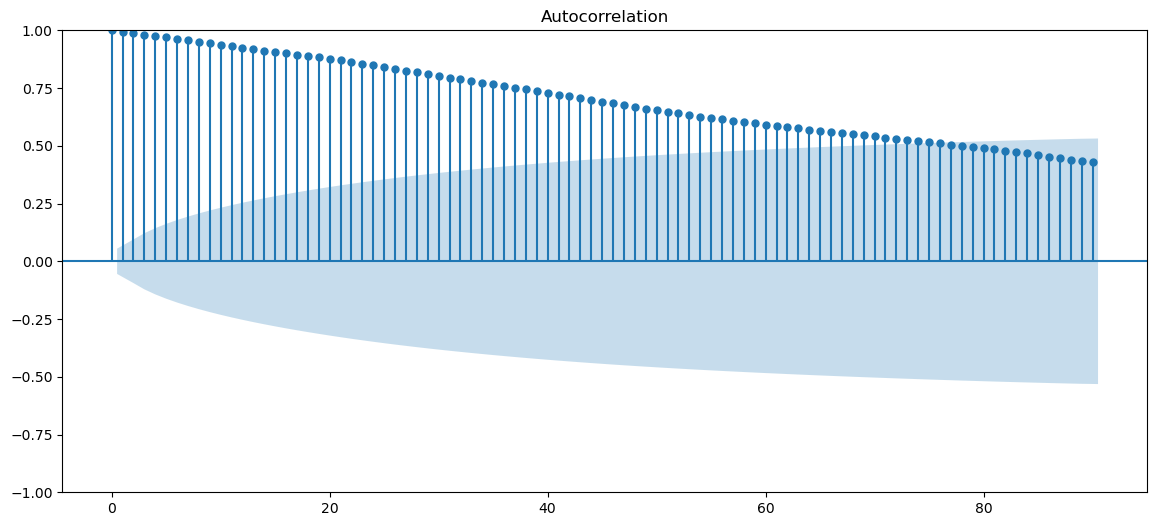

In [79]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(14,6))
    tsa_plots.plot_acf(df3.Price,lags=90)
    plt.show()

# Partial AutoCorrelation Function(PACF)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


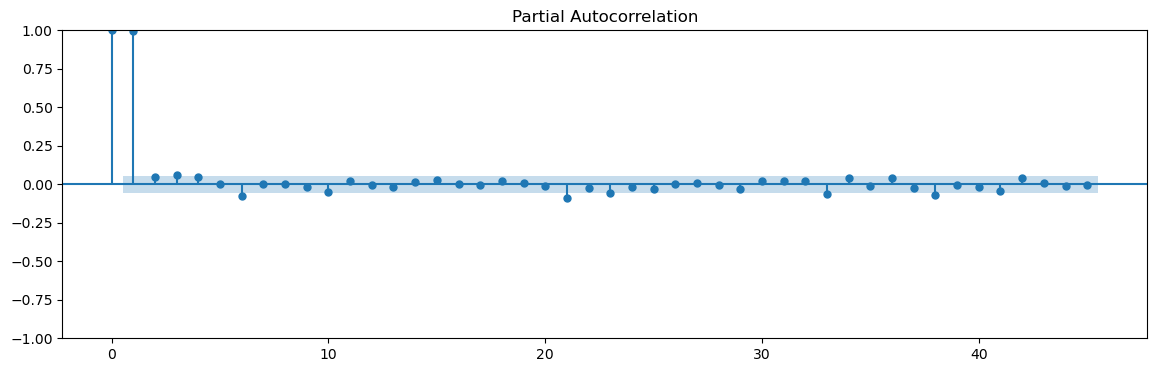

In [80]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure",figsize=(14,4))
    tsa_plots.plot_pacf(df3.Price,lags=45)
    plt.show()

# Time Series Composition

1.Seasonality

2.Trend

# Additive Seasonal Decomposition

In [81]:
from statsmodels.tsa.stattools import adfuller,kpss
#ADF Test
result_adf=adfuller(df3['Price'])
print('ADF Statistic:',result_adf[0])
print('p-value:',result_adf[1])
print('Critical values:',result_adf[4])

ADF Statistic: -1.5609663936973737
p-value: 0.5031659006390711
Critical values: {'1%': -3.4354932690454993, '5%': -2.863811309309343, '10%': -2.5679792659863123}


In [82]:
# KPSS Test
result_kpss=kpss(df3['Price'])
print('\nKPSS Statistic:',result_kpss[0])
print('p-value:',result_kpss[1])
print('Critical values:',result_kpss[3])


KPSS Statistic: 0.5443174420780559
p-value: 0.031685260793230655
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [83]:
import statsmodels.api as sm

def kpss_test_df3():
    result_kpss = sm.tsa.kpss(df3)
    return result_kpss

In [84]:
import statsmodels.api as sm

def kpss_test_df3(df3):
    result_kpss = sm.tsa.kpss(df3)
    return result_kpss

def main():
    # Additional functionality (e.g., data preprocessing, result interpretation)
    pass

if __name__ == "__main__":
    main()

# ARIMA (AutoRegressive Integrated Moving Average) Model

In [85]:
import pandas as pd

# Load the dataset
df3 = pd.read_csv(r'C:\Users\Admin\Desktop\Dataset Oil price daily1.csv')

# Convert the date column to datetime format
df3['Date'] = pd.to_datetime(df3['Date'])

# Set the date column as the index
df3.set_index('Date', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5744\2509190477.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df3['Date'] = pd.to_datetime(df3['Date'])


In [89]:
# Check for stationarity (you can use other methods as well)
# Example: df3['Price'].plot()
# If not stationary, apply differencing: df3['Price_diff'] = df3['Price'] - df3['Price'].shift(1)
df3['Price'].shift(0)

Date
2016-12-27    54.060001
2016-12-28    54.060001
2016-12-29    53.770000
2016-12-30    53.720001
2017-01-01    53.025002
                ...    
2021-12-17    70.860001
2021-12-20    68.230003
2021-12-21    71.120003
2021-12-22    72.760002
2021-12-23    73.790001
Name: Price, Length: 1280, dtype: float64

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


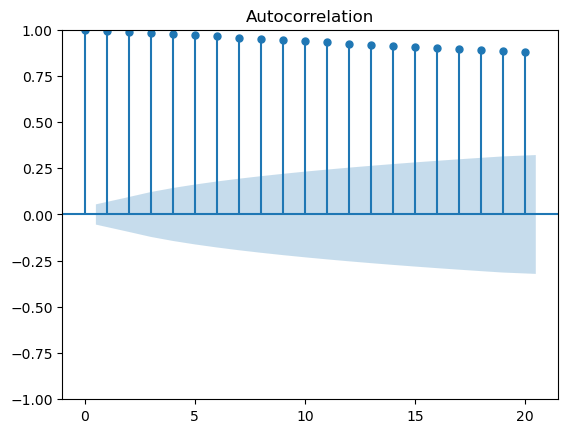

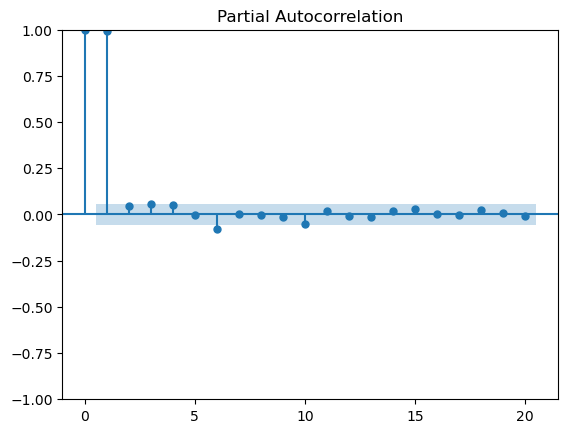

In [91]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(df3['Price'], lags=20)
plot_pacf(df3['Price'], lags=20)
plt.show()

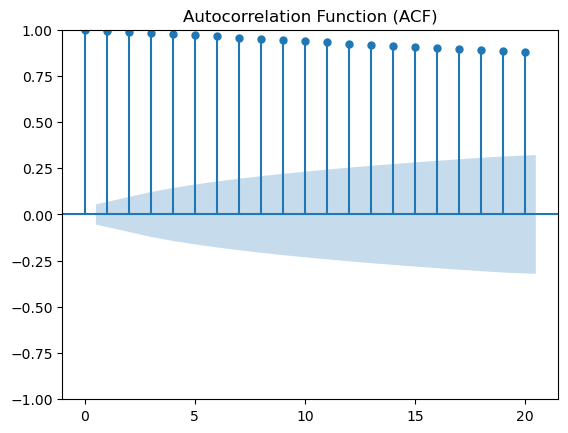

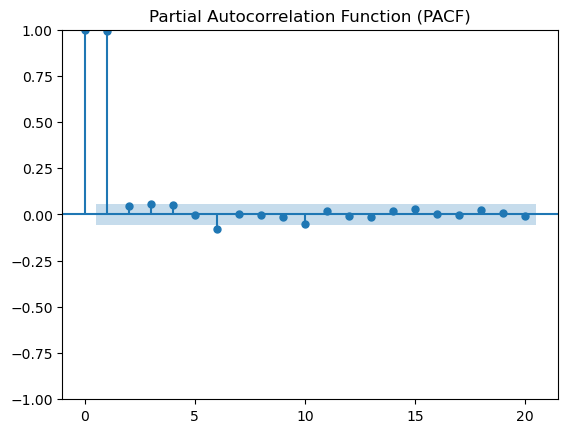

In [94]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(df3['Price'], lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()

plot_pacf(df3['Price'], lags=20)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

In [95]:
from pmdarima import auto_arima

# Fit auto-ARIMA
model = auto_arima(df3['Price'], seasonal=False, suppress_warnings=True)
print("Optimal ARIMA Order:", model.order)

Optimal ARIMA Order: (0, 1, 0)


# Fit the ARIMA Model

In [98]:
!pip install pmdarima

# Fit the ARIMA Model

In [104]:
from statsmodels.tsa.arima_model import ARIMA

# Example: Assuming p=1, d=1, q=1
#model = ARIMA(df3['Price'], order=(1, 1, 1))
#model_fit = model.fit()

# Summary of the model
#print(model_fit.summary())

from statsmodels.tsa.arima.model import ARIMA
# Example: Assuming p=1, d=1, q=1
model = ARIMA(df3['Price'], order=(1, 1, 1))
model_fit = model.fit()
# Summary of the model

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-

In [105]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1280
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2048.886
Date:                Tue, 28 Nov 2023   AIC                           4103.773
Time:                        20:31:18   BIC                           4119.234
Sample:                             0   HQIC                          4109.578
                               - 1280                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4649      0.304      1.528      0.127      -0.132       1.061
ma.L1         -0.5203      0.297     -1.755      0.079      -1.101       0.061
sigma2         1.4420      0.022     64.896      0.0

# Model Evaluation

In [106]:
train_size = int(len(df3) * 0.8)
train, test = df3[:train_size], df3[train_size:]

# Forecast using the fitted model
forecast = model_fit.forecast(steps=len(test))

# Calculate evaluation metrics (e.g., MAE, MSE, RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 8.52
MSE: 113.91
RMSE: 10.67


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


* Mean Absolute Error (MAE): 8.52
* Mean Squared Error (MSE): 113.91
* Root Mean Squared Error (RMSE): 10.67

These values indicate how well your ARIMA model performs in predicting the oil prices. Lower values of MAE, MSE, and RMSE suggest better model accuracy. Remember to monitor the model’s performance over time and make any necessary adjustments as needed.

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-

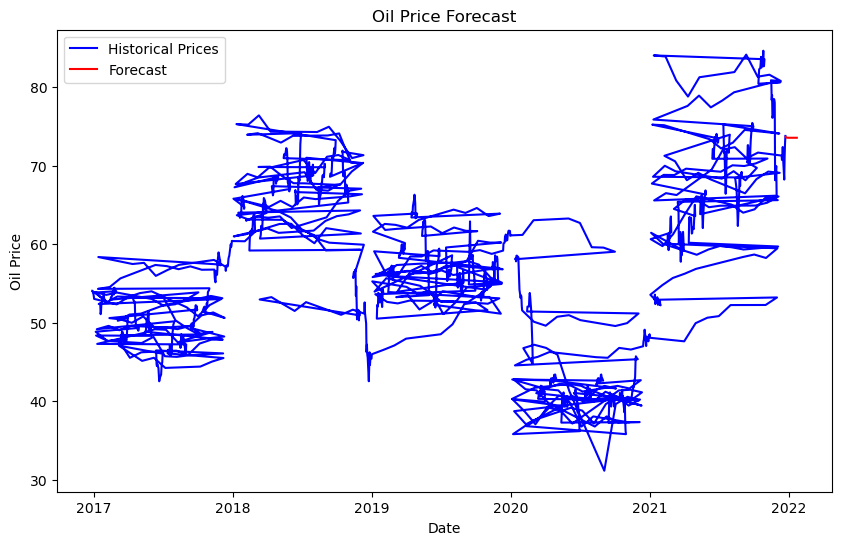

In [109]:
# Assuming p=1, d=1, q=1 (replace with your chosen order)
model = ARIMA(df3['Price'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df3.index, df3['Price'], label='Historical Prices', color='blue')
plt.plot(pd.date_range(start=df3.index[-1], periods=forecast_steps + 1, closed='right'), forecast, label='Forecast', color='red')
#plt.fill_between(pd.date_range(start=df3.index[-1], periods=forecast_steps + 1, closed='right'), forecast - stderr, forecast + stderr, color='gray', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Forecast')
plt.legend()
plt.show()